In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    context="paper",
    style="whitegrid",
    rc={
        "figure.figsize": (3.5, 3.5),
        "figure.dpi": 150,
        "savefig.dpi": 300,
        "figure.constrained_layout.use": True,
    },
)


In [2]:
df_cnn = pd.read_csv("../data/out/generalization/e7ivqipk.csv")
df_cnn["filter"] = "cnn"
df_lmb = pd.read_csv("../data/out/lmb_summary.csv")
df_glmb = pd.read_csv("../data/out/glmb_summary.csv")
df_combined = pd.concat([df_cnn, df_lmb, df_glmb])


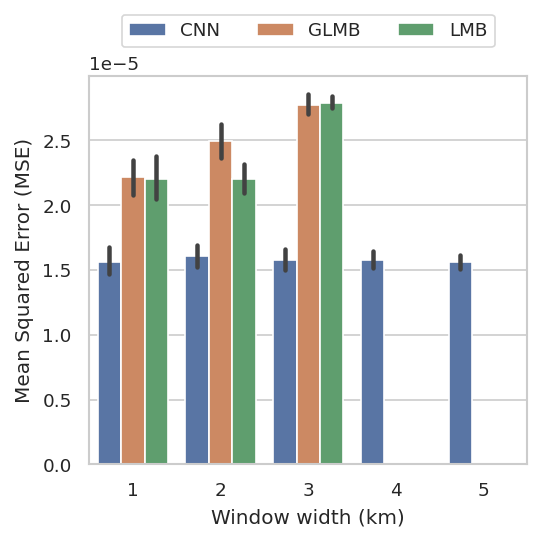

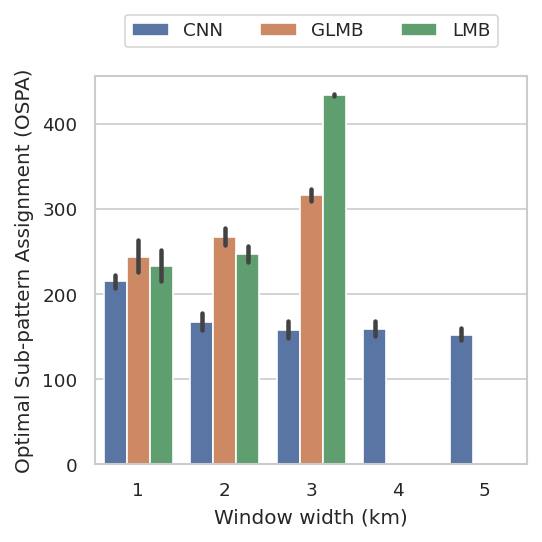

In [3]:
data = (
    df_combined.groupby(["filter", "scale", "simulation_idx"], as_index=False)
    .mean()
    .replace({"cnn": "CNN", "lmb": "LMB", "glmb": "GLMB"})
)

plt.figure()
sns.barplot(data=data, x="scale", y="mse", hue="filter", errorbar="ci")
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=3, title=None)
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Window width (km)")
plt.savefig("../figures/mse.pdf")
plt.show()

plt.figure()
sns.barplot(data=data, x="scale", y="ospa", hue="filter", errorbar="ci")
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=3, title=None)
plt.ylabel("Optimal Sub-pattern Assignment (OSPA)")
plt.xlabel("Window width (km)")
plt.savefig("../figures/ospa.pdf")
plt.show()


/home/damow/.pyenv/versions/3.9.9/envs/mtt/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/damow/.pyenv/versions/3.9.9/envs/mtt/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/damow/.pyenv/versions/3.9.9/envs/mtt/lib/python3.9/site-packages/seaborn/axisgrid.py:208: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  self._figure.subplots_adjust(right=right)


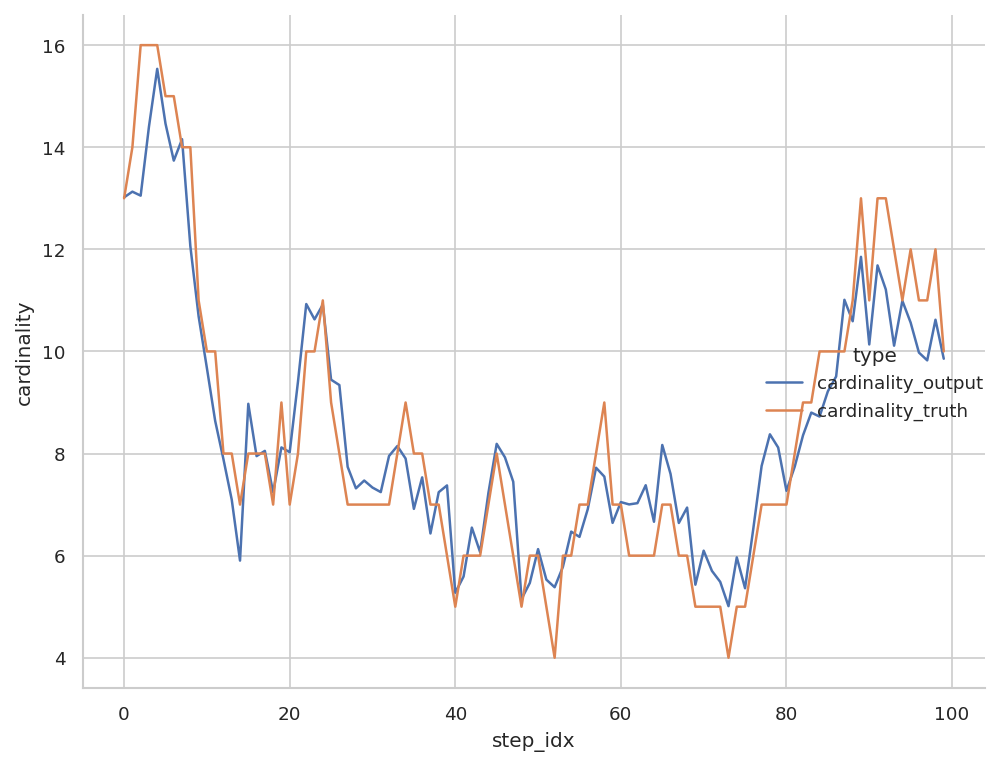

In [4]:
data = df_cnn.query("scale == 1 and simulation_idx == 50").melt(
    id_vars=["step_idx"],
    value_vars=["cardinality_output", "cardinality_truth"],
    var_name="type",
    value_name="cardinality",
)
sns.relplot(data=data, x="step_idx", y="cardinality", hue="type", kind="line")


/home/damow/.pyenv/versions/3.9.9/envs/mtt/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/damow/.pyenv/versions/3.9.9/envs/mtt/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/damow/.pyenv/versions/3.9.9/envs/mtt/lib/python3.9/site-packages/seaborn/axisgrid.py:208: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  self._figure.subplots_adjust(right=right)


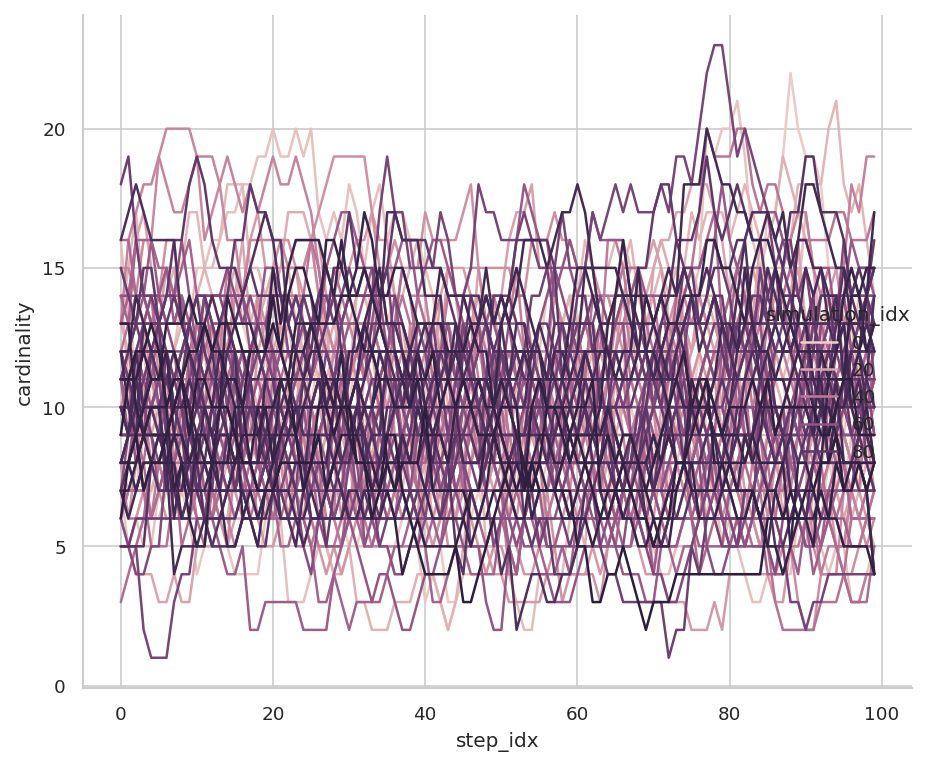

In [5]:
data = df_cnn.query("scale == 1").melt(
    id_vars=["step_idx", "simulation_idx"],
    value_vars=["cardinality_truth"],
    var_name="type",
    value_name="cardinality",
)
sns.relplot(data=data, x="step_idx", y="cardinality", hue="simulation_idx", kind="line")
